# Predicting store sales using Simple Moving average

In [1]:
import pandas as pd

In [24]:
df = pd.read_excel('online_retail.xlsx')

In [26]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Starting EDA to have only the values we need

In [27]:
## First calculating the amount for the item 
df['price'] = (df['Quantity'] * df['UnitPrice'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [28]:
import datetime as datetime

In [29]:
df = df.rename(columns={'InvoiceDate':'Date'})

In [31]:
#taking only columns that we need
df = df[['Date','price']]
df.head()

,Date,price
0,2010-12-01 08:26:00,15.30
1,2010-12-01 08:26:00,20.34
2,2010-12-01 08:26:00,22.00
3,2010-12-01 08:26:00,20.34
4,2010-12-01 08:26:00,20.34


Lets look at whats the range of whole data and see if anything is missing

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    541909 non-null  datetime64[ns]
 1   price   541909 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.3 MB


all the values are non null.
lets check from which date to last date we have the data 

In [34]:
df.Date.min(),df.Date.max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

we have the data from dec 2010 to nov 2011 that is complete and incomplete data for dec 2011.
Lets train the model from dec 2010 to oct 2011 and check for nov 2011 then we will do testing with nov 2011 and final validation on dec 2011. 

Final Summary - 
1. Training -> dec 2010 to nov 2011
2. Testing -> nov 2011
3. Validation -> dec 2011

In [51]:
df_final = df.set_index('Date')

In [52]:
df_final.head()

,price
Date,
2010-12-01 08:26:00,15.30
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,22.00
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,20.34


In [53]:
df_final = df_final.resample('M').sum()

In [55]:
df_final

,price
Date,
2010-12-31,748957.020
2011-01-31,560000.260
2011-02-28,498062.650
2011-03-31,683267.080
2011-04-30,493207.121
2011-05-31,723333.510
2011-06-30,691123.120
2011-07-31,681300.111
2011-08-31,682680.510


In [77]:
df_test = df_final.loc['2010-12-31':'2011-11-30']

lets do the average for 3 months and try to predict it.
Simple moving average means taking the average of last 'n' months and giving it as a prediction.

In [78]:
df_test['predicted_price'] = df_test['price'].rolling(3).mean().shift(1)

C:\Users\Asus\AppData\Local\Temp\ipykernel_14912\2539700767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted_price'] = df_test['price'].rolling(3).mean().shift(1)


In [79]:
df_test

,price,predicted_price
Date,,
2010-12-31,748957.020,NaN
2011-01-31,560000.260,NaN
2011-02-28,498062.650,NaN
2011-03-31,683267.080,602339.976667
2011-04-30,493207.121,580443.330000
2011-05-31,723333.510,558178.950333
2011-06-30,691123.120,633269.237000
2011-07-31,681300.111,635887.917000
2011-08-31,682680.510,698585.580333


now that we have values we can see the difference by plotting graphs

<Axes: xlabel='Date'>

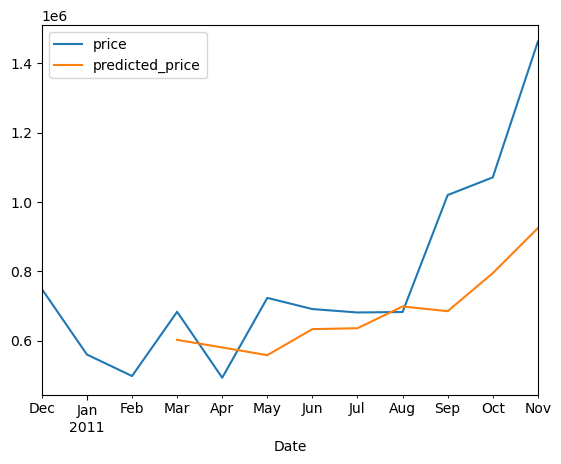

In [82]:
df_test[['price','predicted_price']].plot()

In [ ]:
df_test